In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('StudentsPerformance.csv')

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
x= df.drop(columns=['math score'], axis=1)

In [8]:
y= df['math score']

In [9]:
num_feaures = x.select_dtypes(exclude='object').columns
cat_features = x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_feaures)
    ]
)

In [10]:
x= preprocessor.fit_transform(x)

In [11]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
def evaluate_model(true, predicted):
    mse= mean_squared_error(true,predicted)
    mae= mean_absolute_error(true,predicted)
    r2_scor= r2_score(true,predicted)
    rmse= np.sqrt(mse)
    return mae,mse,rmse,r2_scor

In [14]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNN": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False)

}
modelList =[]
r2_list =[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    modelList.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- RMSE: {:.4F}".format(model_train_rmse))
    print("- MAE: {:.4F}".format(model_train_mae))
    print("- MSE: {:.4F}".format(model_train_mse))
    print("- R2 Score: {:.4F}".format(model_train_r2))

    print("-----------------------------------------")

    print("Model performance for testing set")
    print("- RMSE: {:.4F}".format(model_test_rmse))
    print("- MAE: {:.4F}".format(model_test_mae))
    print("- MSE: {:.4F}".format(model_test_mse))
    print("- R2 Score: {:.4F}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print('-'*35)
    print('\n')

Linear Regression
Model performance for training set
- RMSE: 5.3243
- MAE: 4.2671
- MSE: 28.3485
- R2 Score: 0.8743
-----------------------------------------
Model performance for testing set
- RMSE: 5.3960
- MAE: 4.2158
- MSE: 29.1167
- R2 Score: 0.8803
-----------------------------------


Ridge Regression
Model performance for training set
- RMSE: 5.3233
- MAE: 4.2650
- MSE: 28.3378
- R2 Score: 0.8743
-----------------------------------------
Model performance for testing set
- RMSE: 5.3904
- MAE: 4.2111
- MSE: 29.0563
- R2 Score: 0.8806
-----------------------------------


Lasso Regression
Model performance for training set
- RMSE: 6.5938
- MAE: 5.2063
- MSE: 43.4784
- R2 Score: 0.8071
-----------------------------------------
Model performance for testing set
- RMSE: 6.5197
- MAE: 5.1579
- MSE: 42.5064
- R2 Score: 0.8253
-----------------------------------




  File "c:\ML_Pjs\myenv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\ML_Pjs\myenv\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\ML_Pjs\myenv\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ML_Pjs\myenv\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


KNN
Model performance for training set
- RMSE: 5.7077
- MAE: 4.5167
- MSE: 32.5776
- R2 Score: 0.8555
-----------------------------------------
Model performance for testing set
- RMSE: 7.2530
- MAE: 5.6210
- MSE: 52.6066
- R2 Score: 0.7838
-----------------------------------


DecisionTreeRegressor
Model performance for training set
- RMSE: 0.2795
- MAE: 0.0187
- MSE: 0.0781
- R2 Score: 0.9997
-----------------------------------------
Model performance for testing set
- RMSE: 8.4558
- MAE: 6.6700
- MSE: 71.5000
- R2 Score: 0.7062
-----------------------------------


RandomForestRegressor
Model performance for training set
- RMSE: 2.3001
- MAE: 1.8399
- MSE: 5.2903
- R2 Score: 0.9765
-----------------------------------------
Model performance for testing set
- RMSE: 5.9279
- MAE: 4.6290
- MSE: 35.1397
- R2 Score: 0.8556
-----------------------------------


AdaBoostRegressor
Model performance for training set
- RMSE: 5.7611
- MAE: 4.7236
- MSE: 33.1908
- R2 Score: 0.8528
-------------

In [15]:
pd.DataFrame(list(zip(modelList, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
1,Ridge Regression,0.880593
0,Linear Regression,0.880345
5,RandomForestRegressor,0.855593
8,CatBoostRegressor,0.851632
6,AdaBoostRegressor,0.848529
7,XGBRegressor,0.827797
2,Lasso Regression,0.825320
3,KNN,0.783813
4,DecisionTreeRegressor,0.706171


In [16]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is : %.2f" %score)

Accuracy of the model is : 88.03


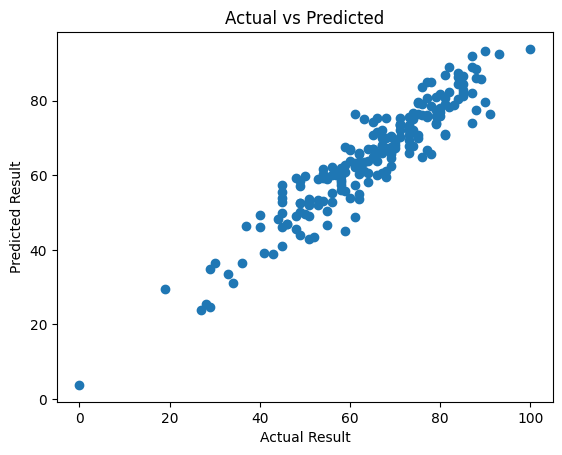

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Result")
plt.ylabel("Predicted Result")
plt.title("Actual vs Predicted")
plt.show()

<Axes: xlabel='math score'>

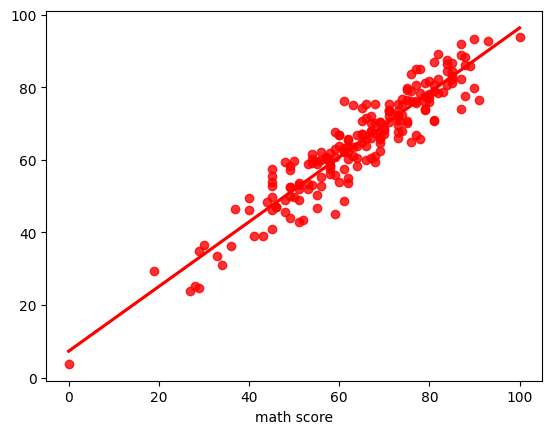

In [19]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

In [21]:
diff = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred, 'Difference': y_test-y_pred})
diff

,Actual,Predicted,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
